<a href="https://colab.research.google.com/github/chadeowen/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module3-gradient-descent/Gradient_Descent_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent Implementation Challenge!!

## Use gradient descent to find the optimal parameters of a **multiple** regression model. (We only showed an implementation for a bivariate model during lecture.)

A note: Implementing gradient descent in any context is not trivial, particularly the step where we calculate the gradient will change based on the number of parameters that we're trying to optimize for. You will need to research what the gradient of a multiple regression model looks like. This challenge is pretty open-ended but I hope it will be thrilling. Please work together, help each other, share resources and generally expand your understanding of gradient descent as you try and achieve this implementation. 

## Suggestions:

Start off with a model that has just two $X$ variables You can use any datasets that have at least two x variables. Potential candidates might be the blood pressure dataset that we used during lecture on Monday: [HERE](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls) or any of the housing datasets. You would just need to select from them the two varaibles $x$ variables and one y variable that you want to work with that you most want to work with. 

Use Sklearn to find the optimal parameters of your model first. (like we did during the lecture.) So that you can compare the parameter estimates of your gradient-descent linear regression to the estimates of OLS linear regression. If implemented correctly they should be nearly identical.

Becoming a Data Scientist is all about striking out into the unknown, getting stuck and then researching and fighting and learning until you get yourself unstuck. Work together! And fight to take your own learning-rate fueled step towards your own optimal understanding of gradient descent! 


In [0]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [20]:
df = pd.read_excel('https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls')
df = df.rename(columns={'X1':'blood_pressure', "X2":'age', "X3":'weight'})
df.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,blood_pressure,age,weight
0,132,52,173
1,143,59,184
2,153,67,194
3,162,73,211
4,154,64,196


In [29]:
# Test run with Bivariate

# Calculate parameters using sklearn and compare to our Gradient Descent Method

# Create X array
X = df['age'].values[:, np.newaxis]

# Normalize X values
X = (X - X.mean()) / X.std()

# Turn X into a matrix by stacking the arrays
X_linalg = np.c_[np.ones(X.shape[0]), X] 

print('X Matrix: ', X_linalg)

# Create y variable list
y = df['blood_pressure'].values

# Fit Model
model = LinearRegression()
model.fit(X, y)

# Assign coefficient and intercept to variables (beta_1, and beta_0)
beta_1 = model.coef_[0]
beta_0 = model.intercept_

print("\nbeta_1: ", beta_1)
print("beta_0: ", beta_0)

X Matrix:  [[ 1.         -1.20301838]
 [ 1.         -0.39751912]
 [ 1.          0.52305147]
 [ 1.          1.21347941]
 [ 1.          0.1778375 ]
 [ 1.          1.32855074]
 [ 1.         -0.97287574]
 [ 1.         -0.16737647]
 [ 1.          0.29290882]
 [ 1.         -1.89344632]
 [ 1.          1.09840809]]

beta_1:  12.715856751330023
beta_0:  150.0909090909091


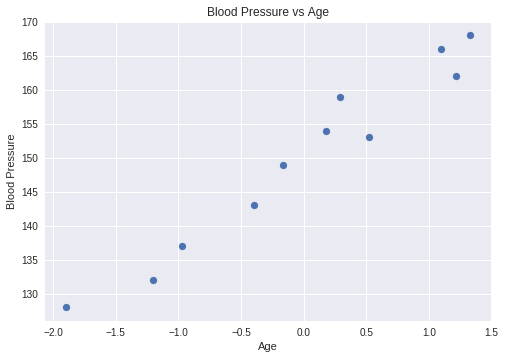

In [22]:
# Plot y vs standardized X

plt.scatter(X,y)

plt.ylabel("Blood Pressure")
plt.xlabel("Age")
plt.title("Blood Pressure vs Age")
plt.show()

In [24]:
# Set hyperparameters
alpha = .01
iterations = 2000
n = len(y)
np.random.seed(42)
theta = [0,0]

# Calculate Predictions
prediction = np.dot(X_linalg, theta)
print("Prediction: \n", prediction)

# Calculate Error
error = prediction - y
print("\nError: \n", error)

# Update Theta List Values
theta = theta - (alpha * (1/n) * np.dot(X.T, error))
print("\nTheta: \n", theta)

Prediction: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Error: 
 [-132. -143. -153. -162. -154. -168. -137. -149. -159. -128. -166.]

Theta: 
 [0.12715857 0.12715857]


In [25]:
# Minimal Gradient-Descent Implementation
def gradient_descent(X, y, theta, iterations, alpha):
  for _ in range(iterations):
    prediction = np.dot(X,theta)
    error = prediction - y
    updates = (alpha * (1/n) * np.dot(X.T,error))
    theta = theta - updates
  return theta

gradient_descent(X_linalg, y, theta, iterations, alpha)

# Confirm with sklearn

array([150.09090881,  12.71585673])

In [26]:
# Multivariate

# Normalize entire dataset

df1 = (df - df.mean())/df.std()
df1.head()

,blood_pressure,age,weight
0,-1.327593,-1.147033,-1.270594
1,-0.520363,-0.379020,-0.635297
2,0.213482,0.498710,-0.057754
3,0.873943,1.157007,0.924069
4,0.286867,0.169561,0.057754


In [0]:
# Create X matrix
X = df1.iloc[:,1:3]

# Turn X into a matrix by stacking arrays
X_linalg = np.c_[np.ones(X.shape[0]), X]

# Create y variable list
y = df1['blood_pressure'].values

# Set hyperameters
theta = [0,0,0]
alpha = .1
iterations = 5000

In [54]:
# Fit Model
model = LinearRegression()
model.fit(X, y)

# Assign coefficient and intercept to variables (beta_1, and beta_0)
beta_1 = model.coef_
beta_0 = model.intercept_

print("beta_1: ", beta_1)
print("beta_0: ", beta_0)

beta_1:  [0.57616409 0.4254835 ]
beta_0:  -2.949017333121613e-16


In [53]:
# Calculate Cost
def computeCost(X, y, theta):
  tobesummed = (alpha * (1/n) * np.dot(X.T,error))
  return np.sum(tobesummed)/(2 * len(X))

computeCost(X,y,theta)

-0.1097612956575818

In [66]:
# Minimal Gradient-Descent Implementation
def gradient_descent(X, y, theta, iterations, alpha):
  for _ in range(iterations):
    prediction = np.dot(X,theta)
    error = prediction - y
    updates = (alpha * (1/n) * np.dot(X.T,error))
    theta = theta - updates
  return theta

gradient_descent(X_linalg, y, theta, iterations, alpha)

# See iterations and alpha

array([-2.78565050e-16,  5.76164087e-01,  4.25483502e-01])

## Stretch Goals

If you happen upon the most useful resources for accomplishing this challenge first, I want you to spend time today studying other variations of Gradient Descent-Based Optimizers.

- Try and write a function that can perform gradient descent for arbitarily large (in dimensionality) multiple regression models. 
- Create a notebook for yourself exploring these topics
- How do they differ from the "vanilla" gradient descent we explored today
- How do these different gradient descent-based optimizers seek to overcome the challenge of finding the global minimum among various local minima?
- Write a blog post that reteaches what you have learned about these other gradient descent-based optimizers.

[Overview of GD-based optimizers](http://ruder.io/optimizing-gradient-descent/)

[Siraj Raval - Evolution of Gradient Descent-Based Optimizers](https://youtu.be/nhqo0u1a6fw)